Area 1  = 3365.0
Perimetro 1  = 243
Area 2  = 1681.5
Perimetro 2  = 246
Area 3  = 2170.5
Perimetro 3  = 286
Area 4  = 2958.0
Perimetro 4  = 222
Area 5  = 3108.0
Perimetro 5  = 222
Area 6  = 2438.5
Perimetro 6  = 236
Area 7  = 3193.0
Perimetro 7  = 245
Area 8  = 4013.0
Perimetro 8  = 255
Area 9  = 3428.5
Perimetro 9  = 220


(-0.5, 337.5, 337.5, -0.5)

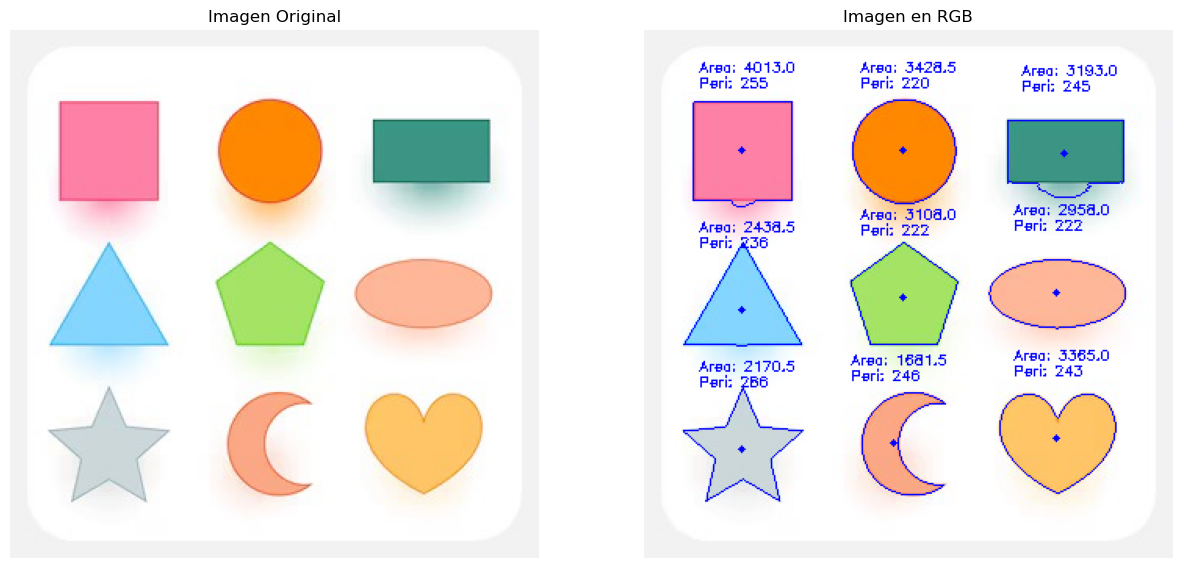

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('figuritas.jpeg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, umbral = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY_INV)

contornos, Tipo = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for i, contar in enumerate(contornos):
    momento = cv2.moments(contar)
    if momento["m00"] != 0:
        cX = int(momento["m10"] / momento["m00"]) 
        cY = int(momento["m01"] / momento["m00"])  
    else:
        cX, cY = 0, 0

    area = cv2.contourArea(contar)
    print("Area", i + 1, " =", area)

    perimetro = int(cv2.arcLength(contar, True))
    print("Perimetro", i + 1, " =", perimetro)

    cv2.putText(img_rgb, "Area: " + str(area), (cX - 27, cY-50), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1) 
    cv2.putText(img_rgb, "Peri: " + str(perimetro), (cX-27 , cY-40), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

    cv2.circle(img_rgb, (cX, cY), 2, (0, 0, 255), -1)

    cv2.drawContours(img_rgb, [contar], -1, (0, 0, 255), 1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen en RGB')
plt.imshow(img_rgb)
plt.axis('off')